NumPy provides some functions for Linear Algebra, Fourier Transforms and Random Number Generation, but not with the generality of the equivalent functions in SciPy.

# <font color = orange><b>Imports</b></font>

In [1]:
#multi-dimensional array
import numpy as np
from numpy import vstack #vertical stacking of arrays

#random sampling from distributions
from numpy.random import rand, randn, normal, standard_normal

#data normalization
from scipy.cluster.vq import whiten

#clustering
from scipy.cluster.vq import kmeans #clustering algorithm
#optimization
from scipy import optimize

#classification
#vector quantization - quantizing (labeling) vectors by
# comparing them with centroids
from scipy.cluster.vq import vq

#put ndarrays into a dataframe for plotting
import pandas as pd

#visualizations
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#sns - Samuel Norman “Sam” Seaborn - 
# on the television serial drama The West Wing
import seaborn as sns

#representing sparse martices
from scipy.sparse import csr_matrix # 'compressed sparse row' matrix
from scipy.sparse import dok_matrix # 'dictionary of keys' matrix

#integration
from scipy.integrate import quad, dblquad

#interpolation
from scipy import interpolate
from scipy.interpolate import interp1d

#generated data
import generate_data as gd

# scipy.<font color = orange><b>interpolate</b></font>

https://www.tutorialspoint.com/scipy/scipy_interpolate.htm

#### plot a function of x

cos (  (x_square/3) + 4)

In [ ]:
#a set of equidistant points within an interval
x = np.linspace (0, 4, 12)

#a function of x
#cos ( (x_square/3) + 4)
y = np.cos (((x**2)/3) + 4)

#plot
sns.scatterplot (x, y)
plt.show ()

#### using interpolation, fit a function to the points

In [ ]:
f1d_lin = interp1d (x, y, kind = 'linear')
f1d_cub = interp1d (x, y, kind = 'cubic')
x_val = 2
print ('1D Linear interpolation estimate for x =', x_val,\
       ':', f1d_lin (x_val))
print ('1D Cubic interpolation estimate for x =', x_val,\
       ':', f1d_cub (x_val))

Note
- if we reduce the number of points on which interpolation was performed, we see the effect of cubic interpolation error <font color = red><b>due to overfitting</b></font>
- for x = np.linspace (0, 4**, 6)**
    - 1D Linear interpolation estimate for x = 2 : 0.5376240708619846
    - 1D Cubic interpolation estimate for x = 2 : 0.6162970299094371

#### plot the interpolation output

In [ ]:
x_vals = np.linspace (0, 4, 30) #input x to the learnt functions
y_vals_lin = f1d_lin (x_vals) #output y from the learnt linear function
y_vals_cub = f1d_cub (x_vals) #output y from the learnt cubic function
plt.plot (x, y, 'o',\
         x_vals, y_vals_lin, '-',\
         x_vals, y_vals_cub, '--')
plt.show ()

# scipy.<font color = orange><b>integrate</b></font>

http://kitchingroup.cheme.cmu.edu/blog/2013/02/02/Integrating-functions-in-python/

## integrands

In [ ]:
#x_square
def integrand_single (x):
    return x**2

# $x$y y.sin(x) + x.cos(y)
#inner-most integral variable should be the first parameter
def integrand_double (y, x):
    return y * np.sin (x) + x * np.cos (y)

## evaluate

In [ ]:
# integrate x_square 
# x = 0..1
ans, err = quad (integrand_single, 0, 1)
print ('\nintegrate x_square from x = 0..1:', ans, err)

# $x$y y.sin(x) + x.cos(y)
# π<=x<=2π
# 0<=y<=π
#We have to provide callable functions for the range of the y-variable.
#Here they are constants, so we create lambda functions
# that return the constants.
ans, err = dblquad (integrand_double, np.pi, 2 * np.pi,\
                   lambda x: 0, lambda x: np.pi)
print ('\nintegrate $x$y y.sin(x) + x.cos(y) from\n π<=x<=2π and 0<=y<=π:',\
       ans, err)

# scipy.<font color = orange><b>optimize</b></font>

https://towardsdatascience.com/optimization-with-scipy-and-application-ideas-to-machine-learning-81d39c7938b8

Using SciPy **gives you deep insight** into the actual working of the algorithm as you have to **construct the loss metric yourself** and not depend on some ready-made, out-of-the-box function.

## Single-Variate Objective Functions

### Plot and Definition

In [ ]:
#parabola
def parabola (x):
    return x**2

#exotic - sin (x) * exp [-0.1 (x - 0.6)^2]
def sinx_exp  (x):
    return np.sin (x) * np.exp (-0.1 * ((x - 0.6) ** 2))

<font color = blue><b>parabola</b></font> <br>
![alt text](parabola.png "Parabola")

<font color = blue><b>sinx_exp</b></font>
<img src = "sinx.exp.png"> <br>
<img src = "sinx.exp-2.png">

### Optimization

#### 1. without constraints, without bounds

##### optimize.<font color = magenta><b>minimize_scalar</b></font> (objfn)

In [ ]:
result = optimize.minimize_scalar (parabola)
print ('minimum of parabola:\n', result)
result = optimize.minimize_scalar (sinx_exp)
print ('\nminimum of sinx_exp:\n', result)

#### 2. with bounds (constraints)

- For sinx-exp, mention **bounds on x** so as to favor local minimum

##### optimize.<font color = magenta><b>minimize_scalar</b></font> (objfn, **bounds** = , **method** = '<font color = magenta><b>Bounded</b></font>')

In [ ]:
result = optimize.minimize_scalar (sinx_exp, bounds = (0, 10), \
                                  method = 'Bounded')
print ('\nminimum of sinx_exp:\n', result)

#### 3. with other functional constraints

<font color = blue><b>sinx_exp constraints</b></font>
![alt text](sinx.exp.constraints.png "sinx_exp constraints")
![alt text](sinx.exp.constraints.plot.png "sinx_exp constraints plot")

In [ ]:
def constraint1 (x):
    return (0.5 - np.log10 (x**2 + 2))
def constraint2 (x):
    return (np.log10 (x**2 + 2) - 1.5)
def constraint3 (x):
    return (np.sin (x) + (0.3 * (x**2)) - 1)

print ('Graphically, constraints met at x = -2.3757.')
print ('Passing x = -2.3757 in constraint functions:\n')
print ('Constraint #1 < 0:', constraint1 (-2.3757))
print ('Constraint #2 < 0:', constraint2 (-2.3757))
print ('Constraint #3 = 0 (almost equal to 0):', constraint3 (-2.3757))

#prepare a dictionary for each constraint
con1 = {'type': 'ineq', 'fun': constraint1} #Inequality
con2 = {'type': 'ineq', 'fun': constraint2} #Inequality
con3 = {'type': 'eq', 'fun': constraint3} #Equality

#prepare a tuple of constraints
cons = (con1, con2, con3)

print (type(con1))
print (type(con2))
print (type(con3))
print (type(con))
#for ic, con in cons:
    #print (ic, con)

##### optimize.<font color = magenta><b>minimize</b></font> (objfn, **bounds** = , **method** = '<font color = magenta><b>Bounded</b></font>')

SciPy allows handling **arbitrary constraints** through the **more generalized** method optimize.<font color = magenta><b>minimize</b></font>.

Note:
- not all methods in the minimize function support constraint and bounds).
- Here we chose **SLSQP** method which stands for <font color = magenta><b>sequential least-square quadratic programming</b></font>
- to use minimize we need to pass on an **initial guess** in the form of <font color = magenta><b>x0</b></font> argument

This code <font color = red><b>fails to optimize</b></font>

In [ ]:
result = optimize.minimize (sinx_exp, x0 = 0, method = 'SLSQP', \
                                  constraints = cons,\
                           options = {'maxiter': 100})
print ('\nminimum of sinx_exp:\n', result)
print ('\nNote the ERROR!!!: success: False')

provide a suitable **initial guess** of x0 = -2

In [ ]:
result = optimize.minimize (sinx_exp, x0 = -2, method = 'SLSQP', \
                                  constraints = cons,\
                           options = {'maxiter': 100})
print ('\nminimum of sinx_exp:\n', result)
print ('\nNote the SUCCESS!!!: success: True')

reduce the number of **iterations** from 100 down to 3

This code <font color = orange><b>fails with iteration limit</b></font>, but succeeds to get <font color = green><b>good enough optimization</b></font>

In [ ]:
result = optimize.minimize (sinx_exp, x0 = -2, method = 'SLSQP', \
                                  constraints = cons,\
                           options = {'maxiter': 3})
print ('\nminimum of sinx_exp:\n', result)
print ('\nNote the FAILURE!!!: success: False')
print ('But, the resultant x is close to the success case.')

## Multi-variate Objective Functions

### Plot and Definition

#### Gaussian Mixture

- gauss 1: mean = -1, sd = 2.1
- gauss 2: mean = 0.3, sd = 0.8
- gauss 1: mean = 2.1, sd = 1.7

<font color = magenta><b>Gaussian Mixture</b></font>
![alt text](gauss-mix.png "Gaussian Mixture")
![alt text](gaussian-formula.png "Gaussian Formula")

In [ ]:
#expects a vetor x
def gaussian_mixture (x):
    
    gausses = []
    for i in range (len(x)):
        gauss = np.exp (-((x[i]-means[i])**2)/(stds[i]**2))
        gausses.append (gauss)

    #objective function is formulated as a function to be minimized
    #maximizing the gaussians is minimizing their negative
    return -1 * sum(gausses)

### Optimization

##### Unbounded Inputs - optimize.<font color = magenta><b>minimize</b></font> (objfn, **method** = '<font color = magenta><b>SLSQP</b></font>')

- gauss 1: mean = -1, sd = 2.1
- gauss 2: mean = 0.3, sd = 0.8
- gauss 1: mean = 2.1, sd = 1.7

Note:
- we get back a **vector** instead of a scalar
- the code below returns an **array of means** of the respective distributuions.

In [ ]:
means = [-1, 0.3, 2.1]
stds = [2.1, 0.8, 1.7]
initial_guess = np.zeros ((3))
result = optimize.minimize (gaussian_mixture, x0 = initial_guess,\
                           method = 'SLSQP',\
                           options = {'maxiter': 100})
print (result)
print ('\nObserve that x is the means of the respective distributuions')

##### Bounded Inputs - optimize.<font color = magenta><b>minimize</b></font> (objfn, <font color = magenta><b>bounds</b></font> = , **method** = 'SLSQP')

If the sub-process settings can occupy only a certain range of values (some must be positive, some must be negative, etc.) then the solution will be slightly different — it may not be the global optimum.

In [ ]:
means = [-1, 0.3, 2.1]
stds = [2.1, 0.8, 1.7]
initial_guess = np.zeros ((3))

x1_bound = (-2,2)
x2_bound = (0,5)
x3_bound = (-3,0)
bounds = (x1_bound, x2_bound, x3_bound)

result = optimize.minimize (gaussian_mixture, x0 = initial_guess,\
                           method = 'SLSQP',\
                           options = {'maxiter': 100},\
                           bounds = bounds)
print (result)
print ('\nObserve that x1 and x2 are still the means, \
while x3 has reduced to almost 0 due to the constraint.')

# scipy.<font color = orange><b>cluster</b></font>

**cluster settings**

In [2]:
num_points = 100
num_dim = 2
num_clusters = 5
cluster_distance = 1
normalize = True

**plot the data**

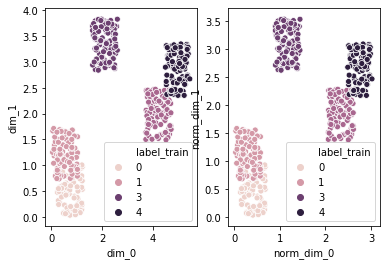

In [3]:
#generate cluster data
df = gd.generate_cluster_data (num_points, \
                              num_dim, num_clusters, cluster_distance, \
                  normalize)

#plot the prepared data and its normalized form
fig, ax = plt.subplots (1, 2)#, figsize = (8, 8))
#parameters are created from column names using *[list]
sns.scatterplot (*(list(df.columns [:num_dim])), 'label_train',\
                 data = df, ax = ax [0])
#from col# num_dim to col# 2*num_dim, say, from col 2 to col 4 (excluding)
sns.scatterplot (*(list(df.columns [num_dim:2*num_dim])), 'label_train',\
                 data = df, ax = ax [1])

plt.show ()

**cluster the data**

> centroids = <font color = magenta><b>kmeans</b></font> (data, n_clusters) <br>
> labels = <font color = magenta><b>vq</b></font> (data, centroids)

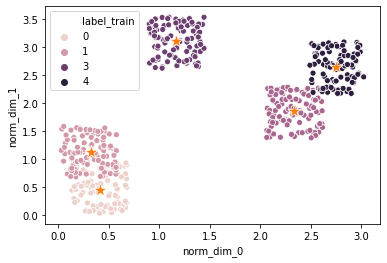

In [4]:
# algorithm
data_norm = df [df.columns [num_dim:-1]].to_numpy ()
centroids, _ = kmeans (data_norm, num_clusters)
# classification
label_test, _ = vq (data_norm, centroids)

# plot

#plot the points
sns.scatterplot (*(list(df.columns [num_dim:2*num_dim])), 'label_train',\
                 data = df)

#plot the centroids
sns.scatterplot (centroids [:, 0], centroids [:, 1],\
                 marker = '*', s = 200)

plt.show ()

# scipy.<font color = orange><b>sparse</b></font>, Sparse Matrix

## Data Structures

### Data

In [ ]:
mat = np.array ([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1],\
                    [0, 0, 0, 2, 0, 0]])
print ('2D array:\n', mat)

### <font color = magenta><b>CSR</b></font> (compressed sparse row) form

In [ ]:
mat_csr = csr_matrix (mat)
print ('Compressed Sparse Row (CSR) form of 2D array:\n', mat_csr)
print ('CSR internals:\n', 'data: ', mat_csr.data,\
       'index pointer: ', mat_csr.indptr, 'indices: ', mat_csr.indices)
mat_dense_from_csr = mat_csr.todense ()
print ('Dense array got back from CSR form:\n', mat_dense_from_csr)

NOTE on CSR internals:
- **indices** [0, 3] are for row_0, [2, 5] are for row_1, [3] is for row_2
- **indptr** 0 points to start of row_0 indices, and 2 points to start of row_1 indices, etc

### <font color = magenta><b>DoK</b></font> (dictionary of keys) form

In [ ]:
mat_dok = dok_matrix (mat)
print ('Dictionary of Keys (DoK) form of 2D array:\n',\
       list (mat_dok.items()))
mat_dense_from_dok = mat_dok.todense ()
print ('Dense array got back from DoK form:\n', mat_dense_from_dok)

### Calculate <font color = magenta><b>Sparsity</b></font>

np.**count_nonzero**(ndarray) and np.ndarray.**size**

In [ ]:
print ('Non-Zero count: ', np.count_nonzero (mat))
print ('Size: ', mat.size)

> density = nonzero_count / size
> sparcity = 1 - density

In [ ]:
print ('Sparsity: ', 1 - (np.count_nonzero (mat) / mat.size))